In [1]:
import torch
import math
import tqdm as notebook_tqdm
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

True
True


In [2]:
dtype = torch.float
device = torch.device("mps")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

# Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 67.75411224365234
199 48.92613983154297
299 36.143890380859375
399 27.45636558532715
499 21.545299530029297
599 17.518798828125
699 14.772904396057129
799 12.898211479187012
899 11.616811752319336
999 10.739954948425293
1099 10.139212608337402
1199 9.727182388305664
1299 9.444260597229004
1399 9.249772071838379
1499 9.115917205810547
1599 9.023693084716797
1699 8.960086822509766
1799 8.916166305541992
1899 8.885812759399414
1999 8.864810943603516
Result: y = 0.006203071214258671 + 0.8602863550186157 x + -0.0010701323626562953 x^2 + -0.09383472055196762 x^3


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from diffusers.models.attention import BasicTransformerBlock
from fastcore.basics import patch

@patch
def forward(self:BasicTransformerBlock, x, context=None):
    x = self.attn1(self.norm1(x.contiguous())) + x
    x = self.attn2(self.norm2(x), context=context) + x
    x = self.ff(self.norm3(x)) + x
    return x

In [6]:
# import os
# don’t actually understand how/why this works with the OMP_NUM_THREADS=1
# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["CUDA_VISIBLE_DEVICES"]=""
# https://forums.fast.ai/t/fastai-on-apple-m1/86059/39

from fastai.vision.all import *

def label_func(f):
    return f[0].isupper()

path = untar_data(URLs.PETS)
path.ls()  # type: ignore
files = get_image_files(path/"images")
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

In [7]:
# type: ignore
# ?? returns source for any function
??get_image_files
# ? returns commment for any function
?get_image_files
# doc(func) gets document links
doc(get_image_files)

get_image_files(path, recurse=True, folders=None)
Get image files in `path` recursively, only in `folders`, if specified.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


Signature: get_image_files(path, recurse=True, folders=None)
Docstring: Get image files in `path` recursively, only in `folders`, if specified.
File:      ~/miniconda3/envs/torch-gpu/lib/python3.9/site-packages/fastai/data/transforms.py
Type:      function


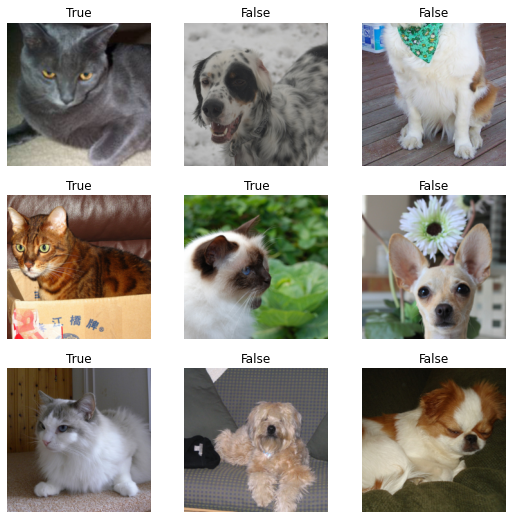

In [8]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)


In [10]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 